In [175]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp
%matplotlib inline

In [176]:
def log_gamma(x, mu, sigma2):
    return -0.5 * ((x - mu)**2 / sigma2).sum(-1)

def log_q(x, sigma2):
    return (- 0.5 * np.log(2 * np.pi * sigma2) - 0.5 * x**2 / sigma2).sum(-1)

def sample_q(shape, sigma2):
    sample_shape = shape + sigma2.shape
    return sigma2 * np.random.randn(*sample_shape)

In [192]:
num_dims = 10
batch_size = 100
sample_size = 5000

target_mu = 0.5
target_sigma2 = 1 * np.ones(num_dims,)

prop_sigma2 = 1 * np.ones(num_dims,)

x = sample_q((batch_size, sample_size), prop_sigma2)
log_weights = log_gamma(x, target_mu, target_sigma2) - log_q(x, prop_sigma2)

log_sum_weights = logsumexp(log_weights, axis=1, keepdims=True)
log_normalized_weights = log_weights - log_sum_weights
log_Z_hat = log_sum_weights[:, 0] - np.log(sample_size)
Z_hat = np.exp(log_Z_hat)

normalized_weights = np.exp(log_normalized_weights)
ess = 1 / (normalized_weights**2).sum(-1)

In [193]:
np.median(log_weights.max(1))

13.69534999370595

In [194]:
log_Z = 0.5 * np.log(2 * np.pi * target_sigma2).sum(-1)
Z = np.exp(log_Z)
(log_Z, Z)

(9.189385332046726, 9792.62991312899)

In [195]:
(log_Z_hat.mean(), Z_hat.mean(), np.median(ess), np.median(ess) / sample_size)


(9.18844546084997, 9793.166945301844, 497.468303294767, 0.0994936606589534)

Text(0.5, 0, 'ESS')

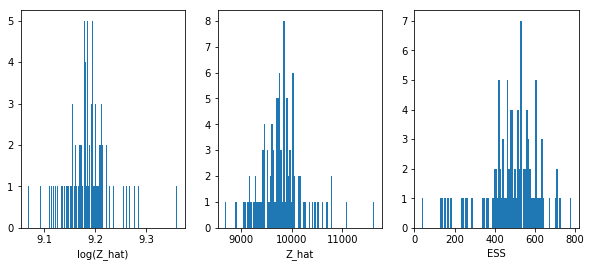

In [196]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.hist(log_Z_hat, bins=200)
plt.xlabel('log(Z_hat)')
plt.subplot(132)
plt.hist(Z_hat, bins=100)
plt.xlabel('Z_hat')
plt.subplot(133)
plt.hist(ess, bins=100)
plt.xlabel('ESS')


Text(0, 0.5, 'Z_hat')

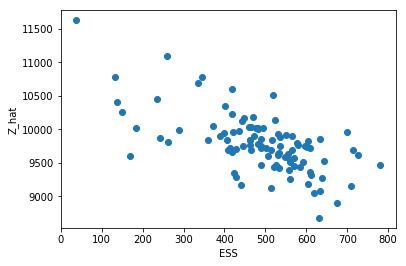

In [197]:
plt.scatter(ess, Z_hat)
plt.xlabel('ESS')
plt.ylabel('Z_hat')

In [190]:
Z_hat.mean()

6558.751640399429

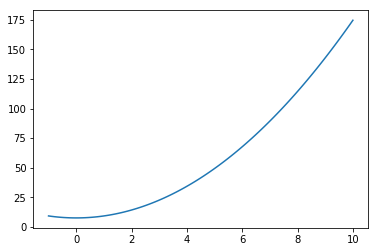

In [191]:
x_range = np.linspace(-1,10,101)
log_w_range = log_gamma(x_range[:, None], target_mu, target_sigma2) - log_q(x_range[:, None], prop_sigma2)
plt.plot(x_range, log_w_range)